In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# from matplotlib.pyplot import figure
import math
from scipy.stats import linregress

In [2]:
def am_done(v):
    '''Return true if all elements of v the same. Else false.'''
    u=np.unique(v) # unique  elements of v
    if u.shape[0]>1:
        return False
    else:
        return True

In [3]:
def WFmodel(generation, L):
    X = np.zeros(shape = (generation, L))
    X[0,:] = range(L)

    for i in range(1, generation):
        oldstates = X[i-1, :]
        for j in range(0, L):
            X[i, j] = oldstates[np.random.randint(low=0, high=L)]
        X[i,:] = np.sort(X[i,:])
        if am_done(X[i,:]) == True:
            stationarity = i
#             trpoint = math.ceil(4*stationarity/3)
#             for a in range(i, trpoint):
#                 for b in range(0, L):
#                     X[a,b] = X[i, 0]
            break
        else:
#             trpoint = generation    
            stationarity = None #actually idk lol
    X = X[:i, :]
#     sns.heatmap(X, cbar = True)
    return X, stationarity
# plt.figure(figsize = (10,8))
# figure.set_size_inches(1, 1)

In [139]:
def avgst(n, generation, L):
    station = np.zeros(n)
    for i in range(0, n):
        station[i] = WFmodel(generation, L)[1]
    return np.average(station)
    
def varL(n, generation, Lmin, Lmax):
    averages = np.zeros(Lmax - Lmin)
    for i in range(0, len(averages)):
        averages[i] = avgst(n, generation, i)
    plt.figure(figsize = (20, 8))
    plt.plot(np.linspace(Lmin, Lmax, len(averages)), averages,
             marker = "x", linestyle = "None", label = "Average over 5 realisations")
    slope, intercept = linregress(np.linspace(Lmin, Lmax, len(averages)), averages)[0:2]
    x = np.linspace(Lmin, Lmax, len(averages))
    y = [x[i] * slope + intercept for i in range(Lmin-1, Lmax-1)]
    plt.plot(x, y, label = "Least Squares Regression")
    plt.legend(fontsize = 20)
    plt.xlabel("L", fontsize = 20)
    plt.ylabel("Time to reach stationarity", fontsize = 20)
    print(slope)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.title("3.c.2 Average time taken to reach stationarity", fontsize = 30)

2.0251753902663014


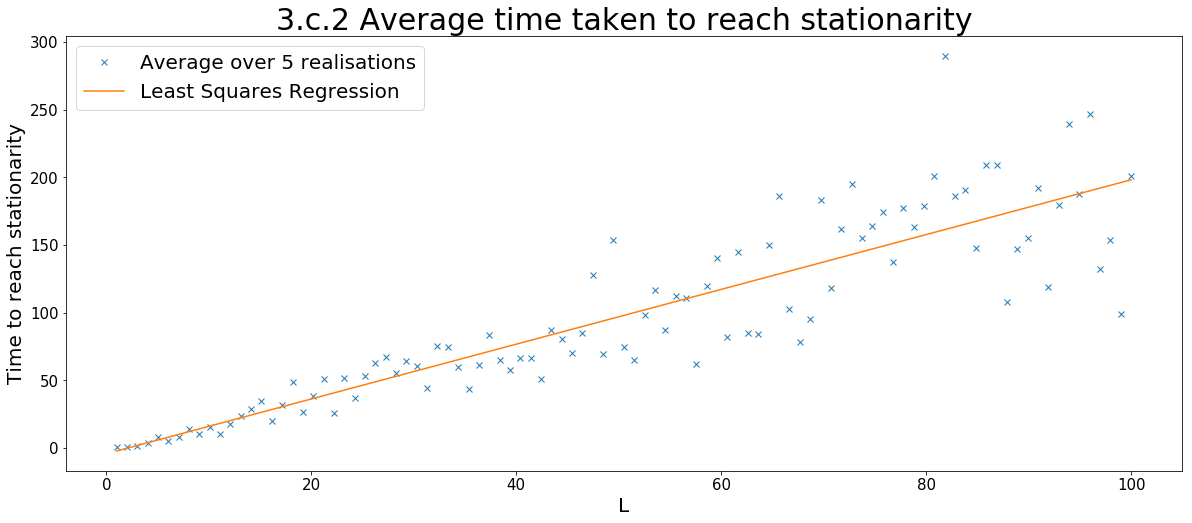

In [140]:
varL(5, 1000, 1, 100)

In [ ]:
print(range(1, 399))

In [167]:
def WFplot(generation, L):
    X = np.zeros(shape = (generation, L))
    X[0,:] = range(1, L+1)

    for i in range(1, generation):
        oldstates = X[i-1, :]
        for j in range(0, L):
            X[i, j] = oldstates[np.random.randint(low=0, high=L)]
        X[i,:] = np.sort(X[i,:])
        if am_done(X[i,:]) == True:
            stationarity = i
            trpoint = math.ceil(4*stationarity/3)
            for a in range(i, 300):
                for b in range(0, L):
                    X[a,b] = X[i, 0]
            break
#         else:
#             trpoint = generation    
#             stationarity = None #actually idk lol
#     X = X[:trpoint, :]
    plt.figure(figsize = (20, 15))
    ax = sns.heatmap(X, cbar = True, cbar_kws={'label': 'Types', 'ticks': [1, 100],
                                               'orientation': 'horizontal'}, cmap = "Blues")
    plt.xlabel("Individuals", fontsize = 20)
    plt.ylabel("Generations", fontsize = 20)
#     i = 0
    
#     yticks = np.empty([])
#     while i < trpoint/100:
#         yticks[i] = 100*(i)
    plt.yticks([0, 100, 200, 300], [0, 100, 200, 300], fontsize = 15)
    plt.xticks([0, 100], [1, 100], fontsize = 15, rotation = 0)
    ax.invert_yaxis()
    plt.title("3.c.1 Wright-Fisher model", fontsize = 30)
#     return X, stationarity
#     plt.figure(figsize = (10,8))
# figure.set_size_inches(1, 1)

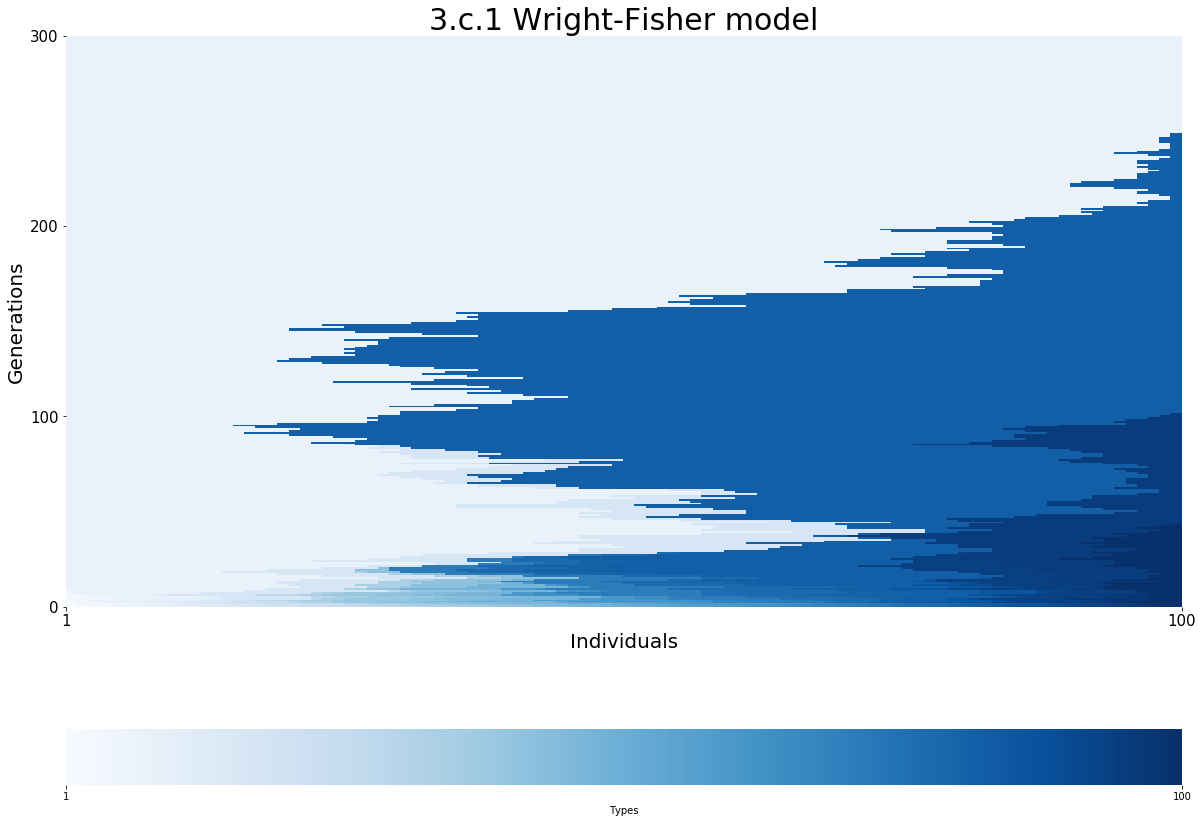

In [172]:
WFplot(300, 100)